# Tarea Semanal 12 
## Nicolas Albano

1) Dada la siguiente transferencia de tensiones:

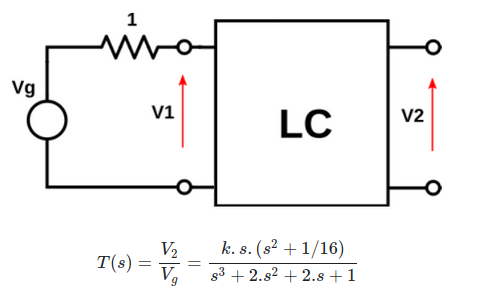

a) Sintetizar un cuadripolo pasivo sin pérdidas, que cumpla con la transferencia de tension indicada, cargando a la entrada con una impedancia como se muestra en la figura.

b) Verificar la transferencia de tension del circuito obtenido.
c) Hallar el valor de k que cumple con la síntesis y valor de los componentes hallados.


2) Dada la siguiente transferencia de impedancia:

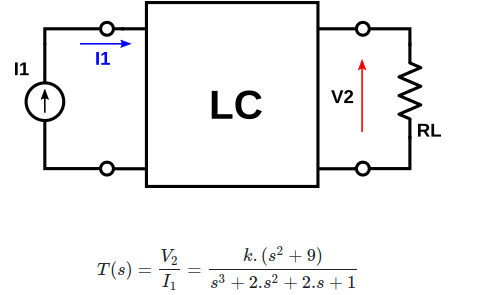

a) Sintetizar un cuadripolo pasivo sin pérdidas, que cumpla con la transimpedancia indicada, cargado a la salida con una impedancia como se muestra en la figura.

b) Verificar la transimpedancia del circuito obtenido.

c) Hallar el valor de k que cumple con la síntesis y valor de los componentes hallados.


### Simulacion en Python de los ejercicios 1 - 2 

In [10]:
import sympy as sp
from schemdraw import Drawing

# Ahora importamos las funciones de PyTC2

from pytc2.remociones import remover_polo_dc, remover_polo_jw, remover_polo_infinito
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_elemento_derivacion,  dibujar_tanque_derivacion, dibujar_tanque_RC_serie,  dibujar_espacio_derivacion, Capacitor, Resistor, ResistorIEC
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display,  Markdown
s = sp.symbols('s ', complex=True)

Z11= (s**3+sp.Rational(2)*s)/(sp.Rational(2)*s**2+sp.Rational(1))
print_latex(a_equal_b_latex_s('Z11(s)',Z11))

<IPython.core.display.Math object>

In [14]:
Y=1/Z11

omega_L1=1/4
Y2, Yl1 = remover_polo_dc(Y, omega_zero = omega_L1 )

L1=Yl1*s
num, den = Y2.as_numer_denom()
roots_num = sp.solve(num, s, dict=True)
print(roots_num)

roots_den = sp.solve(den, s, dict=True)
print(roots_den)

print_latex(a_equal_b_latex_s('Y_2(s)', Y2))
print(Yl1)
print(L1)

[{s: -0.25*I}, {s: 0.25*I}]
[{s: 0}, {s: -sqrt(2)*I}, {s: sqrt(2)*I}]


<IPython.core.display.Math object>

0.451612903225806/s
0.451612903225806


In [17]:
Z2=(31/48*s*(s**2+sp.Rational(2)))/(s**2+sp.Rational(1/16))

Z4, Zt2, L2, C2 = remover_polo_jw(Z2, isImpedance = True, omega = omega_L1 )



print_latex(a_equal_b_latex_s('Y_4(s)', Z4))
print_latex(a_equal_b_latex_s('Y_t2(s)', Zt2))
print(L2)
print(C2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

20.0208333333333
0.799167533818938


In [20]:

# Verificacion por Cuadripolos
# A = V1/V2 -> 1/A = V2/Vg  
Z1= 1
Y1=(14/31)/(s)

Z2= ((961/48)*s) * (1/((768/961)*s)) / ((961/48)*s + (1/((768/961)*s)))
Y2= 1/((31/48)*s)

T1=sp.Matrix([[1 + Z1*Y1, Z1],[Y1,1]])
T2=sp.Matrix([[1 + Z2*Y2, Z2],[Y2,1]])

Ttotal=T1*T2
A=Ttotal[0,0]

A=A.simplify()
print_latex(a_equal_b_latex_s('1/A(s)', 1/A))


<IPython.core.display.Math object>

Parte 2

In [25]:
Z22=(2*s**2 +1)/(s**3+2*s)
print_latex(a_equal_b_latex_s('Z_22(s)', Z22))

Y=1/Z22
print_latex(a_equal_b_latex_s('Y_22(s)', Y))

omega_C1=3
Y2, YC1 = remover_polo_infinito(Y, omega_zero = omega_C1 )

C1=YC1/s
num, den = Y2.as_numer_denom()
roots_num = sp.solve(num, s, dict=True)
print(roots_num)

roots_den = sp.solve(den, s, dict=True)
print(roots_den)

print_latex(a_equal_b_latex_s('Y_2(s)', Y2))
print(YC1)
print(C1)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

[{s: 0}, {s: -3*I}, {s: 3*I}]
[{s: -sqrt(2)*I/2}, {s: sqrt(2)*I/2}]


<IPython.core.display.Math object>

7*s/17
7/17


In [29]:
Y4= ((3/17 *s*(s**2+9))/(2*s**2+1))
print_latex(a_equal_b_latex_s('Y_4(s)', Y4))

omega_C1=3
Z6, Zt2, L2, C2 = remover_polo_jw(1/Y4, isImpedance = True, omega = omega_C1  )



print_latex(a_equal_b_latex_s('Z_6(s)', Z6))
print_latex(a_equal_b_latex_s('Z_t2(s)', Zt2))
print(L2)
print(C2)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

1.18930041152263
0.0934256055363322


In [32]:
# Verificacion 

T1=sp.Matrix([[1, 0], [s*7/17, 1]])
Para= (s*289/243 * 1/(s*27/289))/(s*289/243  + 1/(s*27/289))
T2=sp.Matrix([[1, Para],[0, 1]])
T3=sp.Matrix([[1,0],[27/17*s +1, 1]])
Ttot=T1*T2*T3

print_latex(a_equal_b_latex_s('T_{tot}', Ttot))


<IPython.core.display.Math object>

In [34]:
C=Ttot[1,0]
C=C.simplify()
print_latex(a_equal_b_latex_s('1/C', 1/C))


<IPython.core.display.Math object>

### Simulacion en LtSpice 

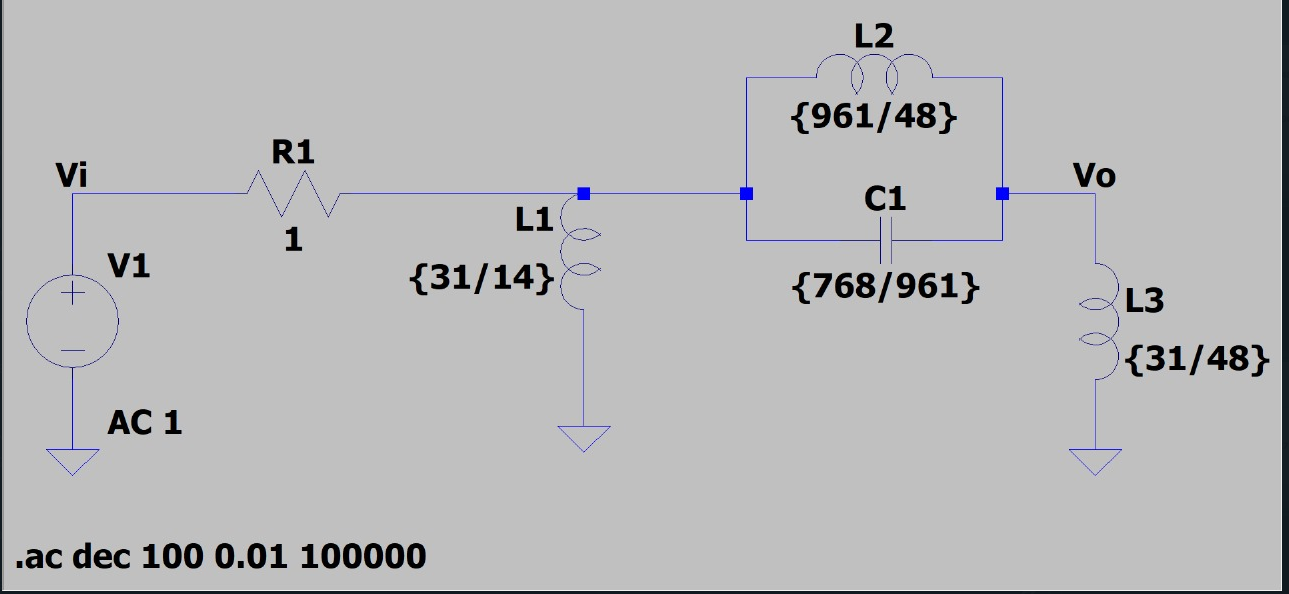

.Figura 1. Circuito ejercicio 1

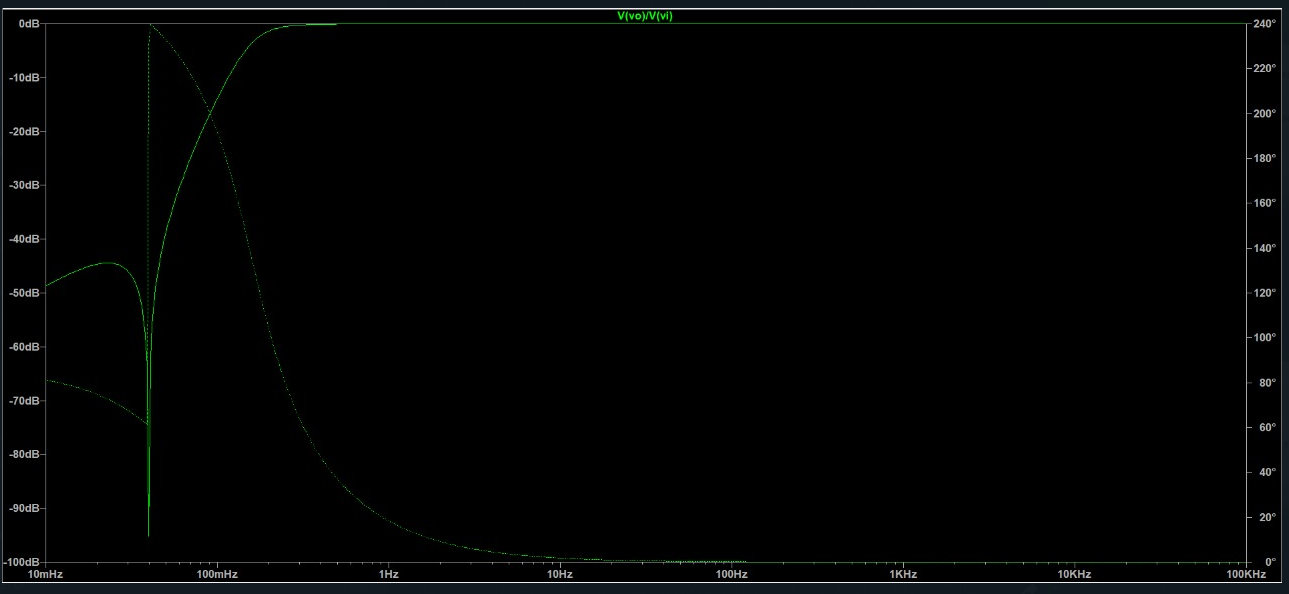

.Figura 2. Transferencia de Tension ejercicio 1 

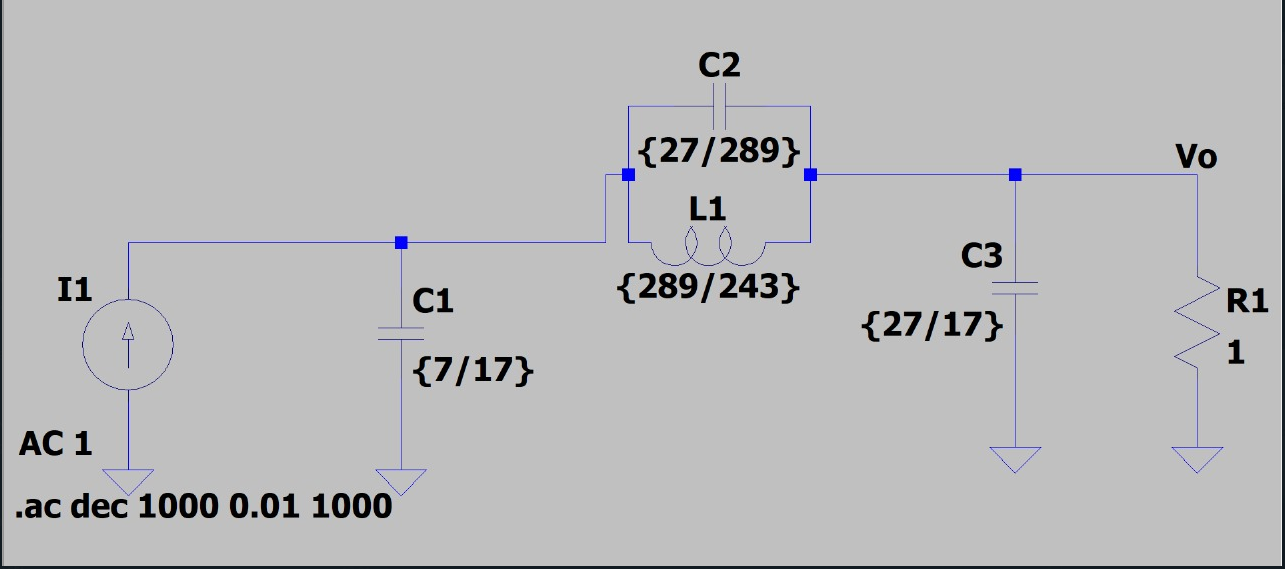

.Figura 3. Circuito Ejercicio 2 

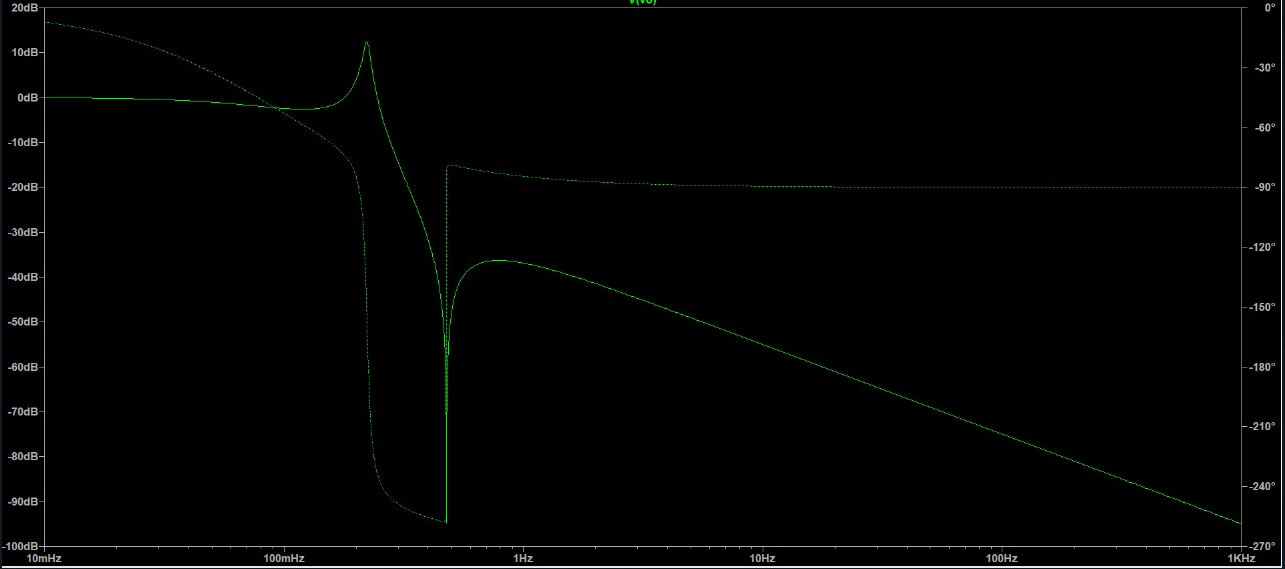

.Figura 4. Transferencia de transimpedancia ejercicio 2